**title**: Intermediate Data Visualization with ggplot2
**author**: Yige Ren
**date**: Jul 5 2022

This case study is part of my work in DataCamp **Data Scientist with R** certificate.

In this project, I practiced skills for making a custom plotting function to explore a large data set, combining statistics and excellent visuals.

The datasets used are R built-in datasets.

## Preliminaries

In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install rpy2

     |████████████████████████████████| 250 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 336 kB 28.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
%load_ext rpy2.ipython

In [20]:
%%R
install.packages("tidyverse", quiet=TRUE)
install.packages("lubridate", quiet=TRUE)
install.packages("lattice", quiet=TRUE)
install.packages("RColorBrewer", quiet=TRUE)
install.packages("openair", quiet=TRUE)

In [17]:
%%R
library(tidyverse)
library(lubridate)
library(lattice)
library(RColorBrewer)
library(openair)

In [18]:
%%R
mtcars1 <- mtcars %>%
  mutate(fcyl=factor(cyl), fam=factor(am))

## Statistics
Topics include a variety of linear models, descriptive and inferential statistics (mean, standard deviation and confidence intervals) and custom functions.

- Modifying stat_smooth:

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



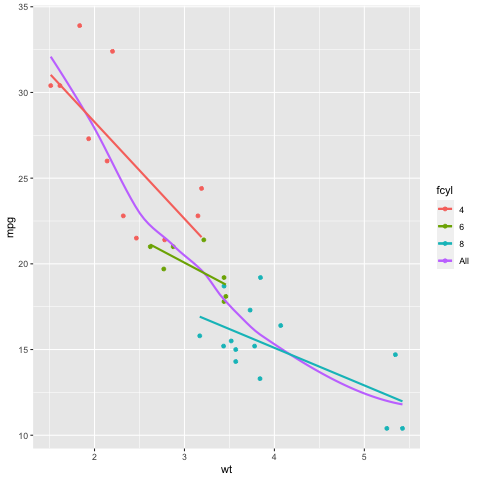

In [48]:
%%R 
ggplot(mtcars1, aes(x = wt, y = mpg, color = fcyl)) +
  geom_point() +
  stat_smooth(se = FALSE,aes(color="All")) +
  stat_smooth(method = "lm", se = FALSE)

- Position

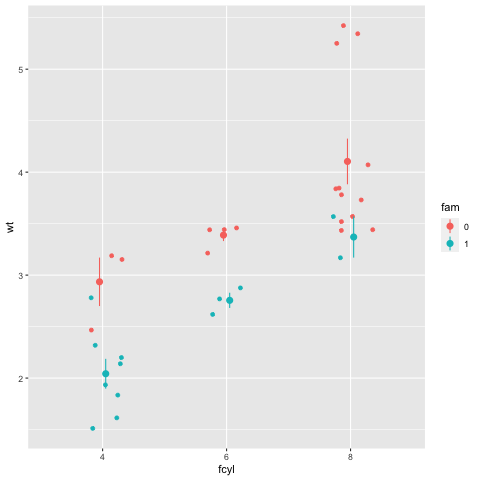

In [41]:
%%R
posn_j <- position_jitter(width = 0.2)
posn_d <- position_dodge(width = 0.1)
posn_jd <- position_jitterdodge(jitter.width = 0.2, dodge.width = 0.1)

# Create the plot base: wt vs. fcyl, colored by fam
p_wt_vs_fcyl_by_fam <- ggplot(mtcars1, aes(fcyl,wt,color=fam))

# Try different position objects
p_wt_vs_fcyl_by_fam + geom_point(position=posn_j)
p_wt_vs_fcyl_by_fam + geom_point(position=posn_d)
p_wt_vs_fcyl_by_fam + geom_point(position=posn_jd)

# Adding layers with jitterred position
p_wt_vs_fcyl_by_fam +
  geom_point(position=posn_j)+
  stat_summary(
    fun.data=mean_cl_normal,
    fun.args=list(mult=1),position=posn_d)

## Coordinates
Topics include various ways of effectively using layers to clearly visualize lognormal datasets, variables with units, and periodic data.

- Zooming In, Aspect Ratio, and Clip

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



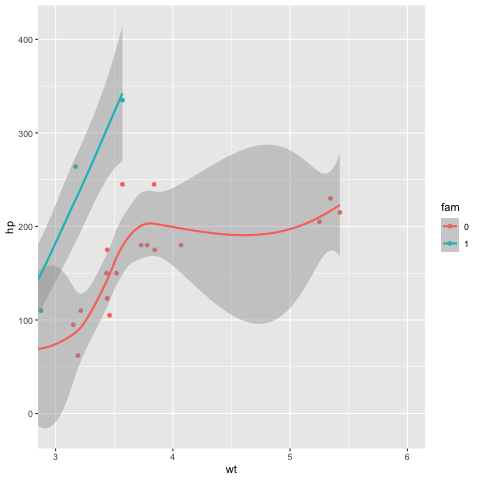

In [52]:
%%R 
#Zomming in
ggplot(mtcars1, aes(x = wt, y = hp, color = fam)) +
  geom_point() +
  geom_smooth() +
  coord_cartesian(xlim=c(3,6))

R[write to console]: `geom_smooth()` using formula 'y ~ x'



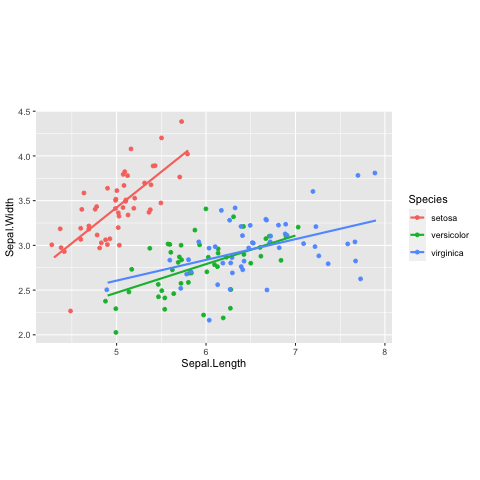

In [53]:
%%R
#Aspect ratio
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) +
  geom_jitter() +
  geom_smooth(method = "lm", se = FALSE) +
  # Fix the coordinate ratio
  coord_fixed()

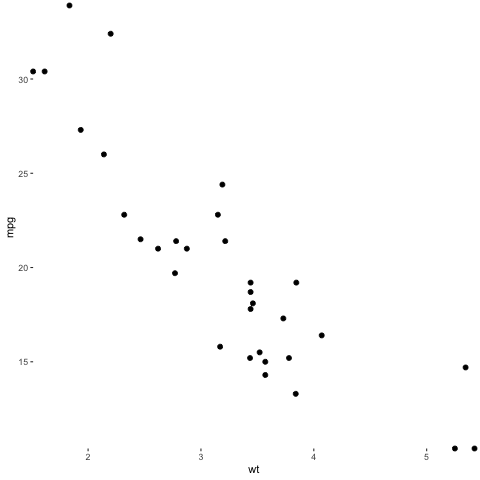

In [54]:
%%R
#Clip
ggplot(mtcars1, aes(wt, mpg)) +
  geom_point(size = 2) +
  coord_cartesian(expand = 0, clip="off") +
  theme_classic() +
  theme(axis.line=element_blank())

- Transform scales

R[write to console]: `geom_smooth()` using formula 'y ~ x'



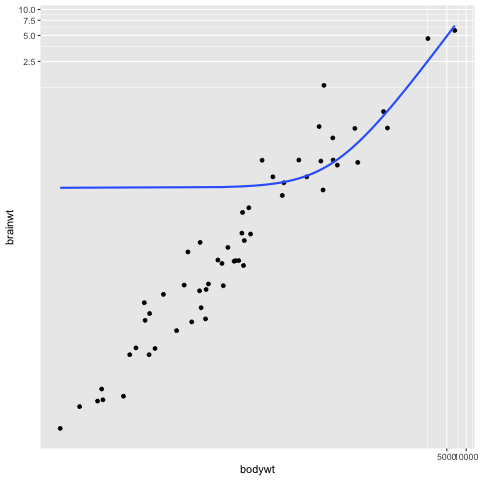

In [43]:
%%R
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  scale_x_log10() +
  scale_y_log10() +
  ggtitle("Scale_ functions")

R[write to console]: `geom_smooth()` using formula 'y ~ x'



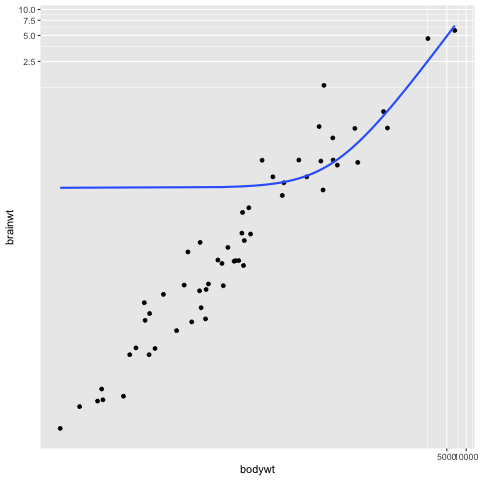

In [55]:
%%R
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  coord_trans(x="log10",y="log10")

- Double and flipped axes

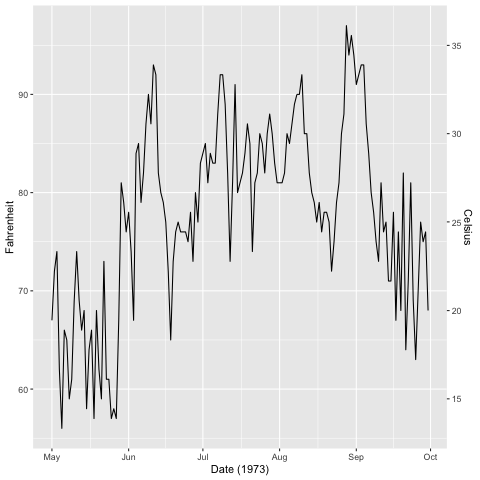

In [57]:
%%R
# Double axes
airquality1 <- airquality %>%
  mutate(Date=make_date(month=Month, day= Day))

y_breaks <- c(59, 68, 77, 86, 95, 104)

y_labels <- (y_breaks - 32) * 5 / 9
secondary_y_axis <- sec_axis(
  trans = identity,
  name = "Celsius",
  breaks = y_breaks,
  labels = y_labels
)

ggplot(airquality1, aes(Date, Temp)) +
  geom_line() +
  scale_y_continuous(sec.axis = secondary_y_axis) +
  labs(x = "Date (1973)", y = "Fahrenheit")

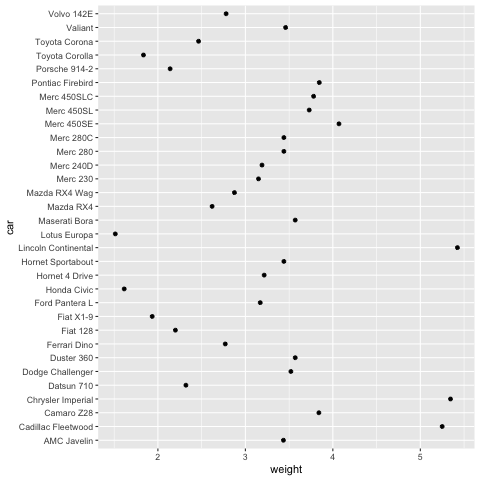

In [56]:
%%R
#Flipping axes
mtcars2 <- mtcars1 %>%
  mutate(car=rownames(mtcars))

ggplot(mtcars2, aes(car, wt)) +
  geom_point() +
  labs(x = "car", y = "weight") +
  coord_flip()

- Pie Charts

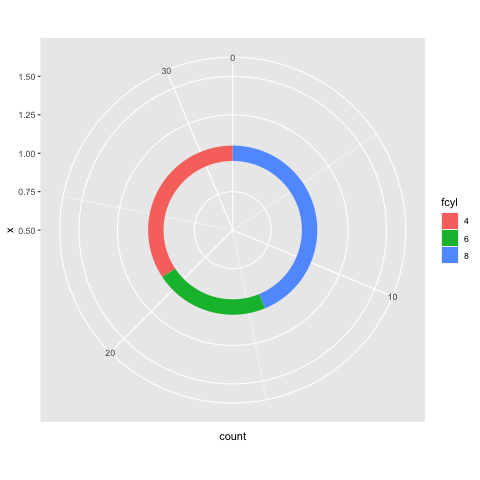

In [58]:
%%R
# Pie chars
ggplot(mtcars1, aes(x = 1, fill = fcyl)) +
  geom_bar(width=0.1) +
  coord_polar(theta = "y") +
  scale_x_continuous(limits=c(0.5,1.5))

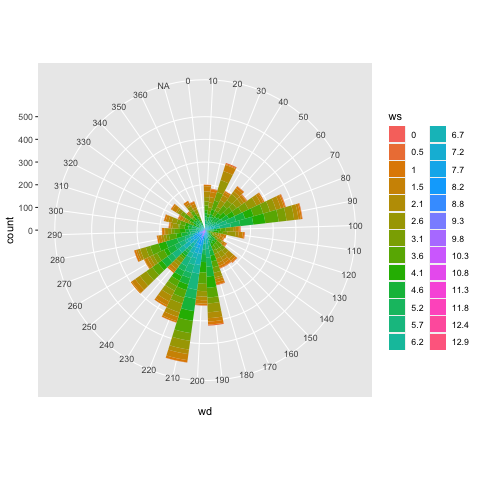

In [59]:
%%R
# Wind rose plots
mydata1 <- mydata %>%
  filter(format(date,"%Y")==2003) %>%
  mutate(ws=factor(ws),wd=factor(wd))
ggplot(mydata1, aes(wd, fill = ws)) +
  geom_bar(width = 1) +
  coord_polar(start = -pi/16)

## Facets
Topics include wrap facets and arrange them in a grid, as well as providing custom labeling.

- Facet layer

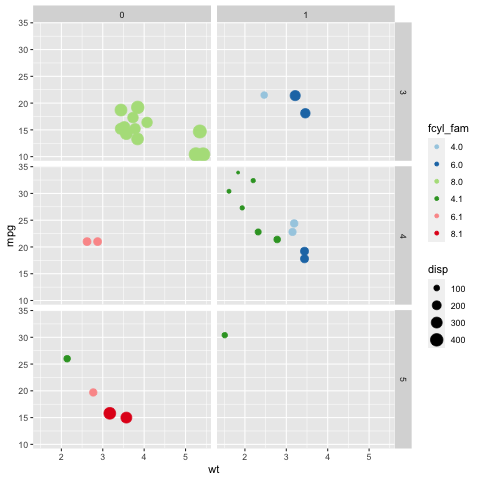

In [61]:
%%R
mtcars3 <- mtcars1 %>%
  mutate(fcyl_fam=interaction(fcyl,fam))

ggplot(mtcars3, aes(x = wt, y = mpg, color = fcyl_fam, size = disp)) +
  geom_point() +
  scale_color_brewer(palette = "Paired") +
  facet_grid(rows = vars(gear), cols = vars(vs))

- Labeling facets

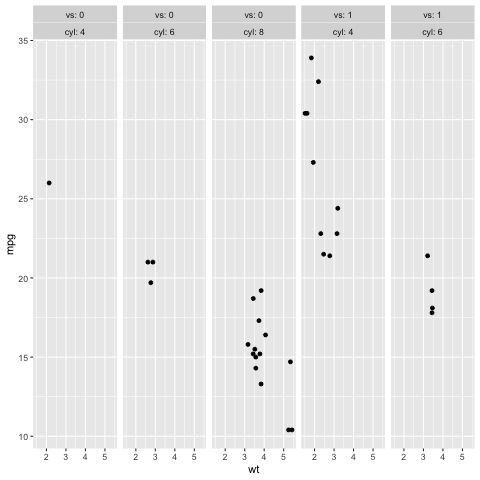

In [62]:
%%R
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  facet_grid(cols = vars(vs, cyl), labeller = label_context)

- Facet plotting spaces

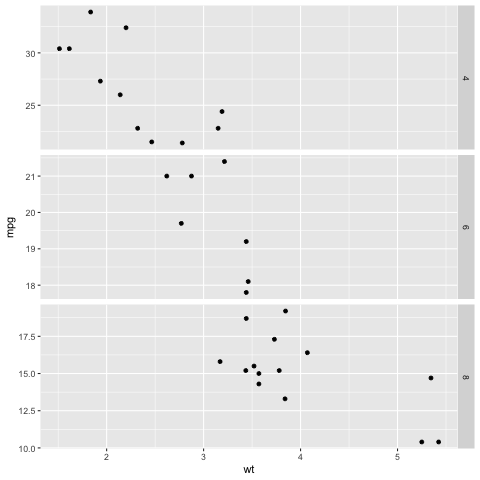

In [63]:
%%R
# Continuous variables
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() + 
  facet_grid(rows = vars(cyl), scales = "free_y")

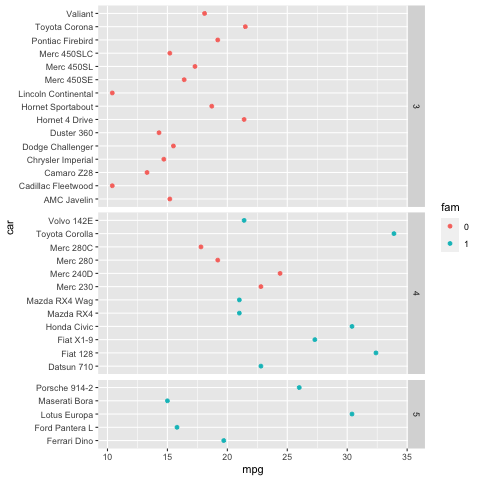

In [64]:
%%R
# Categorical variables
ggplot(mtcars2, aes(x = mpg, y = car, color = fam)) +
  geom_point() +
  facet_grid(rows = vars(gear),scales="free_y",space="free_y")

- Margin plots

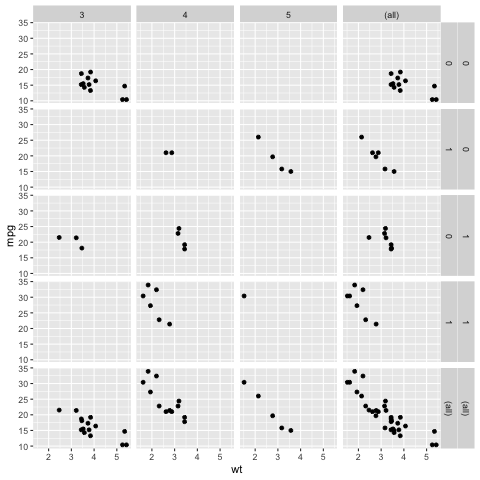

In [65]:
%%R
mtcars4 <- mtcars1 %>%
  mutate(fvs=factor(vs))

ggplot(mtcars4, aes(x = wt, y = mpg)) + 
  geom_point() +
  facet_grid(rows = vars(fvs, fam), cols = vars(gear), margins =c("gear","fvs"))

## All together
Topics include dynamite plots, heatmaps, and heatmap alternatives.

- Dynamite plots

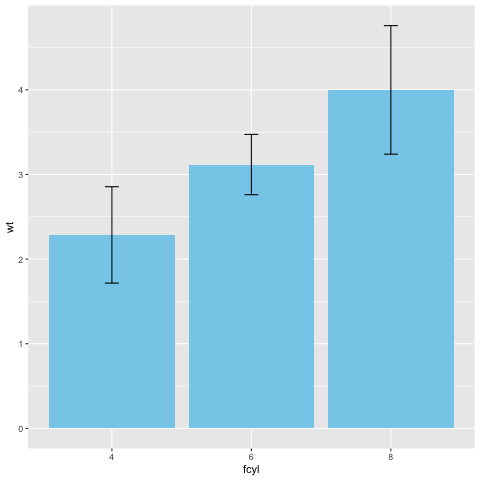

In [66]:
%%R
ggplot(mtcars1, aes(x = fcyl, y = wt)) +
  stat_summary(fun.y = mean, geom = "bar", fill = "skyblue") +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", width = 0.1)

- Heatmap

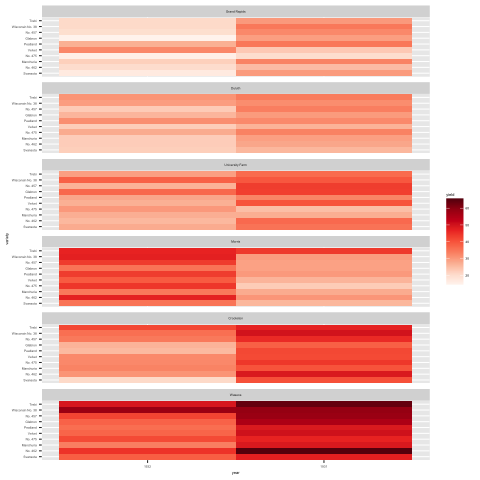

In [67]:
%%R
red_brewer_palette <- brewer.pal(9, "Reds")

ggplot(barley, aes(x = year, y = variety, fill = yield)) +
  geom_tile() + 
  facet_wrap(facets = vars(site), ncol = 1) +
  scale_fill_gradientn(colors=red_brewer_palette)+
  theme(text = element_text(size = 4))

- Heatmap Alternatives

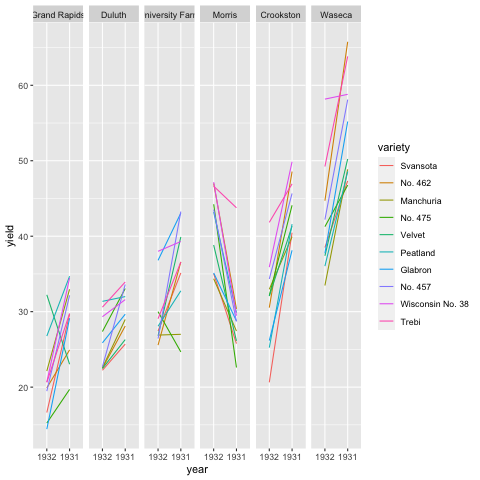

In [68]:
%%R
ggplot(barley,aes(year,yield,color=variety,group=variety)) +
 geom_line() +
  facet_wrap( ~ site, nrow = 1)

- A real-world problem

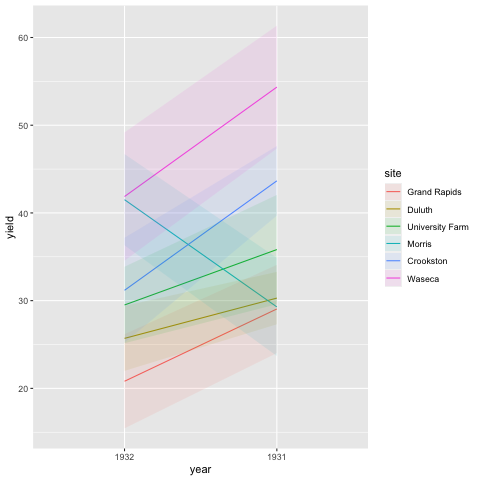

In [69]:
%%R
ggplot(barley, aes(x = year, y = yield, color = site, group = site, fill = site)) +
  stat_summary(fun.y = mean, geom = "line") +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "ribbon", alpha = 0.1, color = NA)

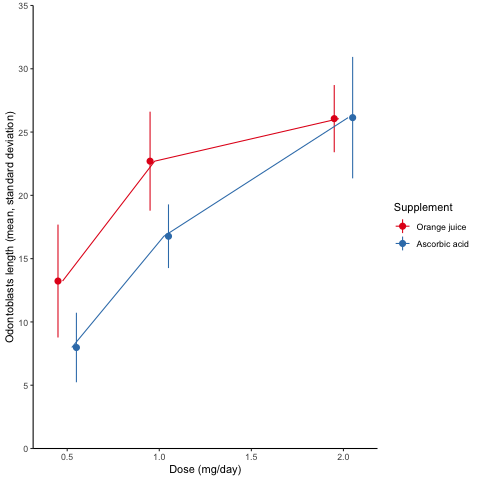

In [70]:
%%R
TG<-ToothGrowth
TG$dose <- as.numeric(as.character(TG$dose))

growth_by_dose <- ggplot(TG, aes(dose, len, color = supp)) +
  stat_summary(fun.data = mean_sdl,
               fun.args = list(mult = 1),
               position = position_dodge(0.2)) +
  stat_summary(fun.y = mean,
               geom = "line",
               position = position_dodge(0.1)) +
  theme_classic() +
  labs(x = "Dose (mg/day)", y = "Odontoblasts length (mean, standard deviation)", color = "Supplement") +
  scale_color_brewer(palette = "Set1", labels = c("Orange juice", "Ascorbic acid")) +
  scale_y_continuous(limits = c(0,35), breaks = seq(0, 35, 5), expand = c(0,0))

growth_by_dose